In [82]:
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

load_dotenv(find_dotenv())

True

In [83]:
project_root = os.environ.get("PROJECT_ROOT")
data_dir = os.environ.get("DATA_DIR")
dataset_fullpath = os.path.join(project_root, data_dir, "output")
dataset_fullpath

'/student/tdy245/Projects/cmpt828_deeplearning/PaCo/data/output'

In [84]:
large_patches_df = pd.read_csv(os.path.join(dataset_fullpath, "large-patches.csv"))
small_patches_df = pd.read_csv(os.path.join(dataset_fullpath, "small-patches.csv")) 

In [91]:
large_patches_df.head()

,dataset,tool,buggy,patch,label
0,Bugs.jar-math-45,jKali-DifferentFragPatches,final double ret; final double absX = org.apa...,if (true) {,overfitting
1,Defects4J-Chart-5,jKali-DifferentFragPatches,if (this.autoSort) { this.data.add(((-index) ...,if (false) {,overfitting
2,Defects4J-Math-8,jKali-DifferentFragPatches,final T[] out = ((T[]) (java.lang.reflect.Arr...,,overfitting
3,Bears-139,jKali-DifferentFragPatches,} } if (parser.hasNext(2)) { decodeDataFields...,if (false) {,overfitting
4,Defects4J-Closure-10,jKali-DifferentFragPatches,} static boolean mayBeString(com.google.javas...,if (false) {,overfitting


In [90]:
len(large_patches_df)

49694

Visualize and Remove the hard Negatives of small_dataset

In [85]:
small_df_ = pd.crosstab(small_patches_df["dataset"], small_patches_df["label"])
small_df_.name = "small_patches"

In [86]:
small_df_ = pd.crosstab(small_patches_df["dataset"], small_patches_df["label"])
small_df_.name = "small_patches"

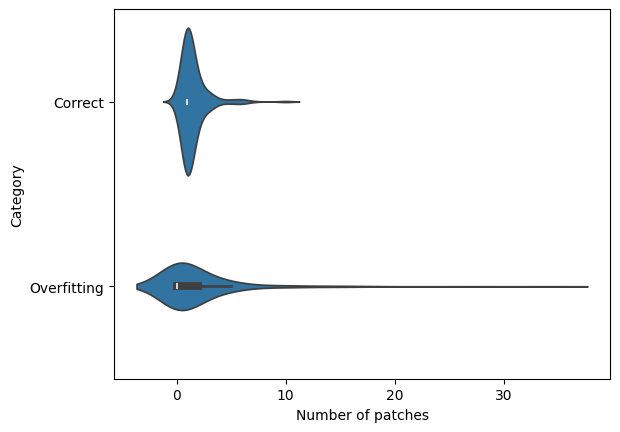

In [76]:
data = pd.DataFrame({
        "Number of patches": np.concatenate([small_df_["correct"] , small_df_["overfitting"] ]),
        "Category": ["Correct" for i in range(len(small_df_["correct"]))] + ["Overfitting" for i in range(len(small_df_["overfitting"]))]
    })

sns.violinplot(data=data, y='Category', x="Number of patches", bw_method=.5);

In [87]:
large_df_ = pd.crosstab(large_patches_df["dataset"], large_patches_df["label"])
large_df_.name = "large_patches"

In [88]:
len(large_df_)

855

<Axes: xlabel='Number of patches'>

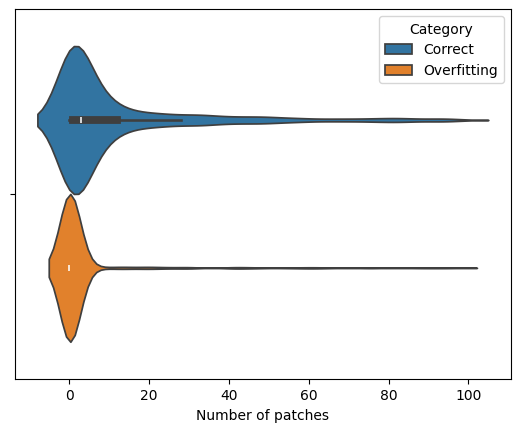

In [80]:
data = pd.DataFrame({
        "Number of patches": np.concatenate([large_df_["correct"] , large_df_["overfitting"] ]),
        "Category": ["Correct" for i in range(len(large_df_["correct"]))] + ["Overfitting" for i in range(len(large_df_["overfitting"]))]
    })

sns.violinplot(data=data, x="Number of patches", hue="Category", bw_method=.2)

In [77]:
large_df_ = large_df_.loc[large_df_['overfitting'] < 100]

In [79]:
large_df_ = large_df_.loc[large_df_['correct'] < 100]

In [81]:
len(large_df_)

735

In [53]:
len(small_df_)

356

In [54]:
small_df_ = small_df_.loc[small_df_['overfitting'] < 10]